In [44]:
#In order to do this, we need to make it into a function!! - the whooole thing, wuhu
def scrapeboliga(urlinput):
        #we need to introduce BeautifulSoup, re and requests:
    from bs4 import BeautifulSoup
    import requests as rq
    urlstring=rq.get(urlinput).text
    urlsoup=BeautifulSoup(urlstring,"html.parser")

    #We need to get the information string for:
    #for each element, we need specific html->find_all with BS ->list ->append to a clear list
#FIRST PRIS
    prishtml=urlsoup.find_all(class_="primary-value d-flex justify-content-end")
    prisstring=str(prishtml)
    
    #define what string we are looking for in the chunk of html
    import re
    priskode=re.compile("(\s\d+?.\d+\.\d+)")
    
    #find the string:
    priser=priskode.findall(prisstring)
    
    #delete the dots
    udotspriser=str(priser)
    udot=udotspriser.replace(".","")
    
    #make it into a list of big numbers
    tal=re.compile("\d{7,8}")
    pricelist=tal.findall(udot)
    finalpricelist=[]
    for element in pricelist:
        talelement=int(element)
        finalpricelist.append(talelement)
    
    #we need to remove the first two (in order to end with 50)
    while len(finalpricelist)>50:
        finalpricelist.pop(0)
    
#THE SAME FOR METER:
    #find html specific code...
    html=urlsoup.find_all("app-house-details")
    meterstykke=[]
    for element in html:
        meterstykke.append(element.find_all("span")[1])
    
    #define what we are looking for:
    meter=re.compile("\d+?\s")
    meterstring=str(meterstykke)
    themeterlist=meter.findall(meterstring)
    finalmeterlist=[]
    for element in themeterlist:
        talelement=int(element)
        finalmeterlist.append(talelement)
    
    #We need to remove the first two (in order to end with 50)
    while len(finalmeterlist)>50:
        finalmeterlist.pop(0)

#EJERUDGIFT
    #we can just look in all of the html provided for the specific expression:
    ejerudgift=re.compile("(Ejerudgift: )(\d+?.\d+)")
    
    #let's look:
    urlsoupstring=str(urlsoup)
    ejerudgiftlist=ejerudgift.findall(urlsoupstring)
    ejerudgiftstring=str(ejerudgiftlist)
    
    #let's remove the dots:
    udendots=ejerudgiftstring.replace(".","")
    
    #let's get only the numbers:
    onlynumber=re.compile("\d{2,7}")
    ejerudgiftclean=onlynumber.findall(udendots)
    
    #and transform it to numbers:
    finalejerudgiftlist=[]
    for element in ejerudgiftclean:
        talelement=int(element)
        finalejerudgiftlist.append(talelement)
    
    
#ADRESS
    #find the address-htmlchunk:
    addresshtml=urlsoup.find_all(class_="w-100 mt-1 listing-address font-weight-bold text-nowrap text-truncate")    
    addresshtmlstring=str(addresshtml)
    
    #narrow down inside the htmlchunk - only addresses
    # we need to tell it that we will play around with it with BeautifulSoup
    adsoup=BeautifulSoup(addresshtmlstring,"html.parser")
    addresstext=adsoup.get_text()
    #so far so good - but it needs to be a list of addresses:
    addresslist=addresstext.split(" , ")
    #and it needs to be max 50, not 52
    while len(addresslist)>50:
        addresslist.pop(0)
    
    #Our output would be a dictionary of the three elements for each house assigned to adress
    #this means that the three things are going to be put together in a dict and returned as
    if len(addresslist)==len(finalpricelist)==len(finalejerudgiftlist)==len(finalmeterlist):
        
        #make it into a tuple
        tup=zip(addresslist,finalpricelist,finalejerudgiftlist,finalmeterlist)
        ofhouses=list(tup)
        
        #everytime it works it prints 'succes!'
        print("Success!")
        return ofhouses
    else:
       ##     print("der er et ulige antal inputs:")
            print("adresser:",len(addresslist),"priser:",len(finalpricelist),"ejerudgifter:",len(finalejerudgiftlist),"størrelser:",len(finalmeterlist))

In [45]:
a=scrapeboliga("https://www.boliga.dk/resultat?propertyType=3&page=1&sort=zipCode-a")

adresser: 50 priser: 50 ejerudgifter: 0 størrelser: 50


In [59]:
type(all_a[2])

NoneType

In [6]:
#inspiration from justmarkham(github)
import requests  
r = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')

from bs4 import BeautifulSoup  
soup = BeautifulSoup(r.text, 'html.parser')  
results = soup.find_all('span', attrs={'class':'short-desc'})

records = []  
for result in results:  
    date = result.find('strong').text[0:-1] + ', 2017'
    lie = result.contents[1][1:-2]
    explanation = result.find('a').text[1:-1]
    url = result.find('a')['href']
    records.append((date, lie, explanation, url))

import pandas as pd  
df = pd.DataFrame(records, columns=['date', 'lie', 'explanation', 'url'])  
df['date'] = pd.to_datetime(df['date'])  
df.to_csv('trump_lies.csv', index=False, encoding='utf-8') 

In [84]:
len(records[0])

4

In [85]:
len(all_a[0][0])

4

In [100]:
#making a list of looong urls
boligaurl="https://www.boliga.dk/resultat?propertyType=3&page="
def lotsofurls(urlinput):
    i=0
    urls=[]
    while i<128:
        i+=1
        urls.append(urlinput+str(i))
    return urls
    

In [101]:
url=lotsofurls(boligaurl)

In [69]:
#it does not work when DataFraming all_a - it tells me that there are more than 50 columns
new_list=[]
for element in all_a:
    for piece in element:
        new_list.append(piece)

In [11]:
import pandas as pd
file=pd.read_csv("boligapriser.csv")

In [14]:
file.keys()

Index(['adresse', 'pris', 'ejerudgift', 'meter'], dtype='object')

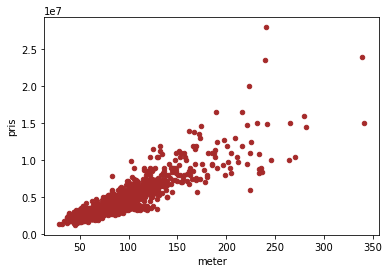

In [39]:
import matplotlib.pyplot as plt
file.plot(kind="scatter",x="meter",y="pris",color="brown")
#plt.scatter[file[file["meter"][file["pris"]],]]

In [ ]:
#mangler - at gøre priserne til også at gælde mindre beløb end 1 mio
#det samme gælder for ejerudgifter